In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#from statsmodels.tsa.statespace.varmax import VARMAX
#from statsmodels.tsa.statespace.sarimax import SARIMAX
#from statsmodels.tsa.api import VAR
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
data = pd.read_csv("Foreign_Exchange_Rates.csv",parse_dates=['Time Serie'])# index_col=['Time Serie'])
data

,Unnamed: 0,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
0,0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.805,1.4465,8.2798,7.7765,...,1.6563,7.329,101.7,3.8,7.964,8.443,72.3,1.5808,31.38,36.97
1,1,2000-01-04,1.5239,0.97,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,...,1.6535,7.218,103.09,3.8,7.934,8.36,72.65,1.5565,30.6,37.13
2,2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.856,1.4518,8.2798,7.778,...,1.656,7.208,103.77,3.8,7.935,8.353,72.95,1.5526,30.8,37.1
3,3,2000-01-06,1.5291,0.9686,1.9436,0.607,1.84,1.4571,8.2797,7.7785,...,1.6655,7.2125,105.19,3.8,7.94,8.3675,72.95,1.554,31.75,37.62
4,4,2000-01-07,1.5272,0.9714,1.938,0.6104,1.831,1.4505,8.2794,7.7783,...,1.6625,7.2285,105.17,3.8,7.966,8.415,73.15,1.5623,30.85,37.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5212,5212,2019-12-25,ND,ND,ND,ND,ND,ND,ND,ND,...,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND
5213,5213,2019-12-26,1.4411,0.9007,1.5002,0.7688,4.0602,1.3124,6.9949,7.788,...,1.354,6.7295,109.67,4.1337,8.8799,9.4108,181.3,0.9808,30.11,30.15
5214,5214,2019-12-27,1.4331,0.8949,1.4919,0.7639,4.0507,1.3073,6.9954,7.7874,...,1.352,6.6829,109.47,4.126,8.8291,9.3405,181.35,0.9741,30.09,30.14
5215,5215,2019-12-30,1.4278,0.8915,1.4846,0.761,4.0152,1.3058,6.9864,7.7857,...,1.3483,6.6589,108.85,4.1053,8.7839,9.3145,181.6,0.9677,30.04,29.94


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5217 entries, 0 to 5216
Data columns (total 24 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Unnamed: 0                                 5217 non-null   int64         
 1   Time Serie                                 5217 non-null   datetime64[ns]
 2   AUSTRALIA - AUSTRALIAN DOLLAR/US$          5217 non-null   object        
 3   EURO AREA - EURO/US$                       5217 non-null   object        
 4   NEW ZEALAND - NEW ZELAND DOLLAR/US$        5217 non-null   object        
 5   UNITED KINGDOM - UNITED KINGDOM POUND/US$  5217 non-null   object        
 6   BRAZIL - REAL/US$                          5217 non-null   object        
 7   CANADA - CANADIAN DOLLAR/US$               5217 non-null   object        
 8   CHINA - YUAN/US$                           5217 non-null   object        
 9   HONG KONG - HONG KO

In [4]:
#data[["Time Serie","CHINA - YUAN/US$"]].nunique()

In [5]:
#data = data.drop_duplicates(subset=["CHINA - YUAN/US$"])
#data

In [6]:
#df = data.duplicated(subset=["CHINA - YUAN/US$"]).to_frame()
#df.head(5)

In [7]:
#df[df[0]==True]

In [8]:
#data[["Time Serie","CHINA - YUAN/US$"]].nunique()

In [9]:
df = data[["Time Serie","CHINA - YUAN/US$"]]
df.head(5)

,Time Serie,CHINA - YUAN/US$
0,2000-01-03,8.2798
1,2000-01-04,8.2799
2,2000-01-05,8.2798
3,2000-01-06,8.2797
4,2000-01-07,8.2794


In [10]:
df = df.replace("ND", np.nan)
df = df.fillna(method = "ffill")

In [11]:
df["Time Serie"] = pd.to_datetime(df["Time Serie"], format= "%Y-%m-%d")
df.set_index("Time Serie", inplace = True)

#Resample and ffil missing data
#df["CHINA - YUAN/US$"] = df["CHINA - YUAN/US$"].resample("24H").mean().fillna(method="ffill")

#Remove null values
df.dropna(inplace=True)
df

,CHINA - YUAN/US$
Time Serie,
2000-01-03,8.2798
2000-01-04,8.2799
2000-01-05,8.2798
2000-01-06,8.2797
2000-01-07,8.2794
...,...
2019-12-25,7.0064
2019-12-26,6.9949
2019-12-27,6.9954


In [12]:
df["CHINA - YUAN/US$"] = df["CHINA - YUAN/US$"].astype(float)

In [13]:
df.shape

(5217, 1)

##### EDA

<Axes: xlabel='Time Serie'>

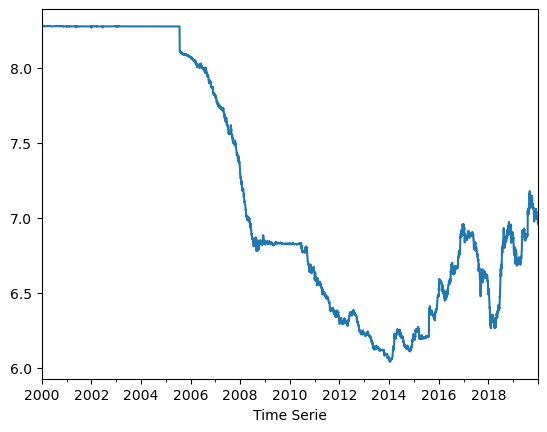

In [14]:
#Trend of China-Yuan/US$ over time 
df["CHINA - YUAN/US$"].plot.line(x =df.index,  y = "CHINA - YUAN/US$")

<Axes: xlabel='CHINA-YUAN/US$', ylabel='Hours In Weeks'>

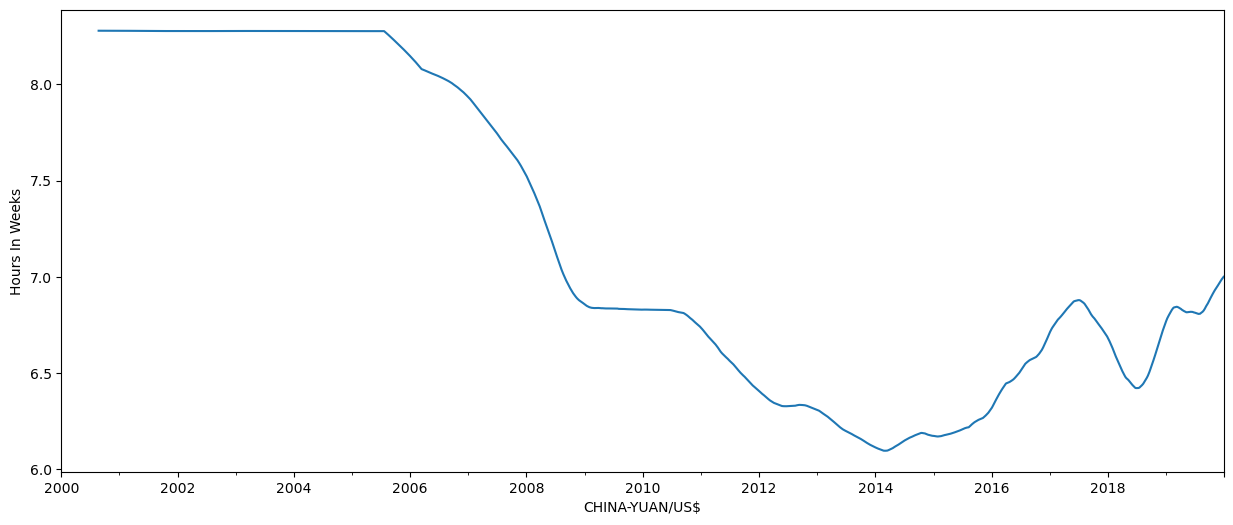

In [15]:
fig, ax = plt.subplots(figsize=(15, 6))
df["CHINA - YUAN/US$"].rolling(168).mean().plot(ax=ax, xlabel= "CHINA-YUAN/US$", ylabel="Hours In Weeks")

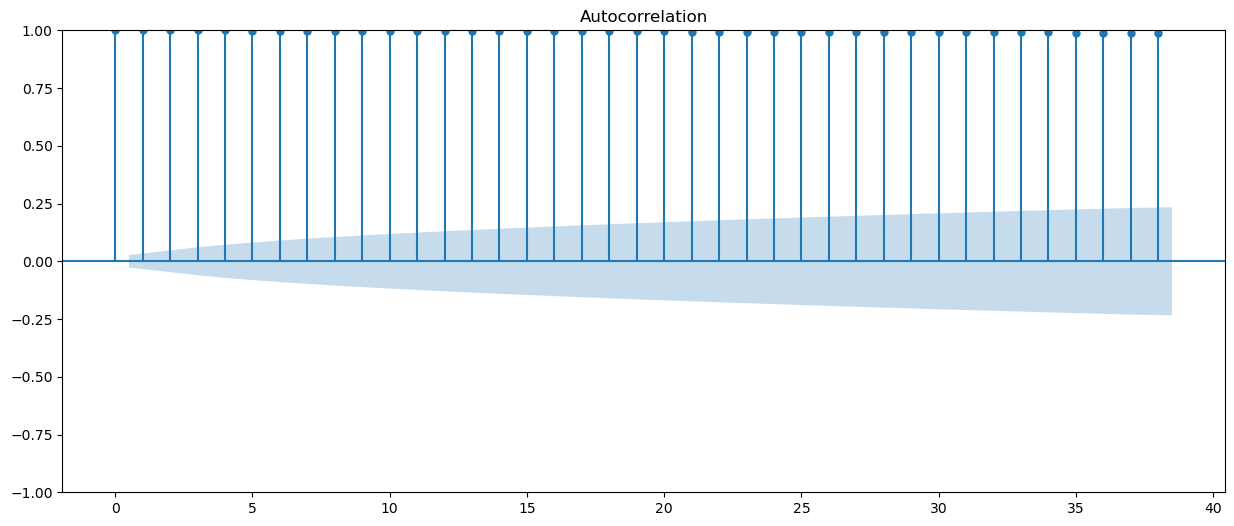

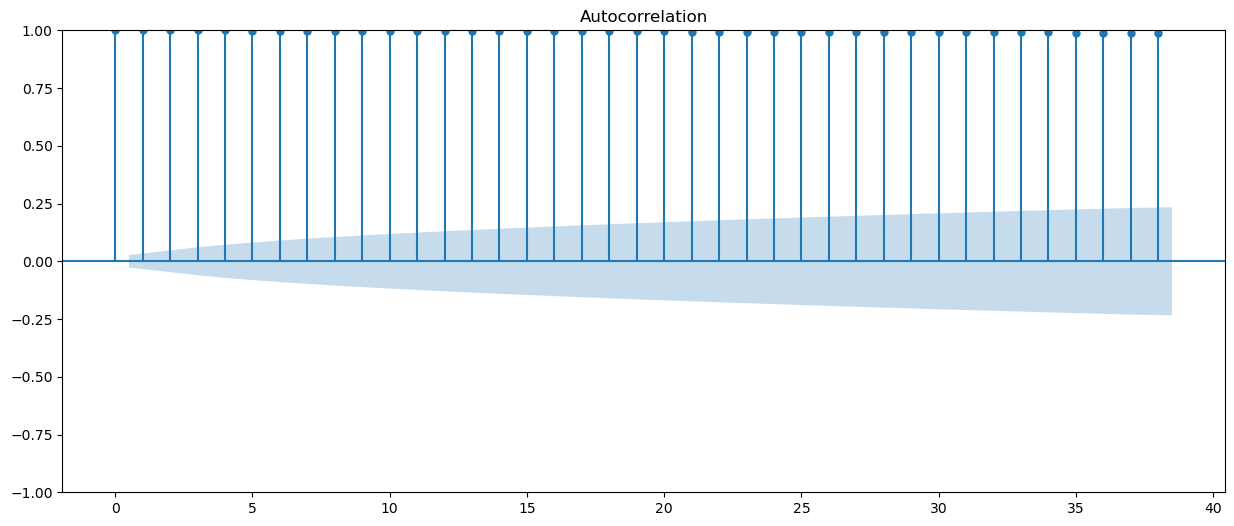

In [16]:
# Create an ACF plot
fig, ax = plt.subplots(figsize=(15, 6))
plot_acf(df, ax=ax)

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


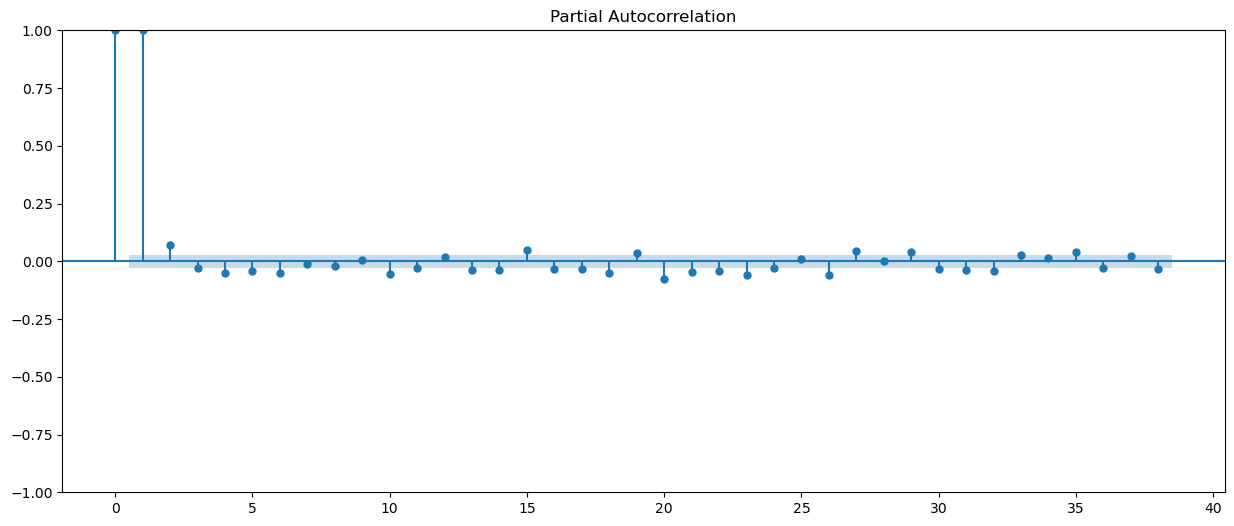

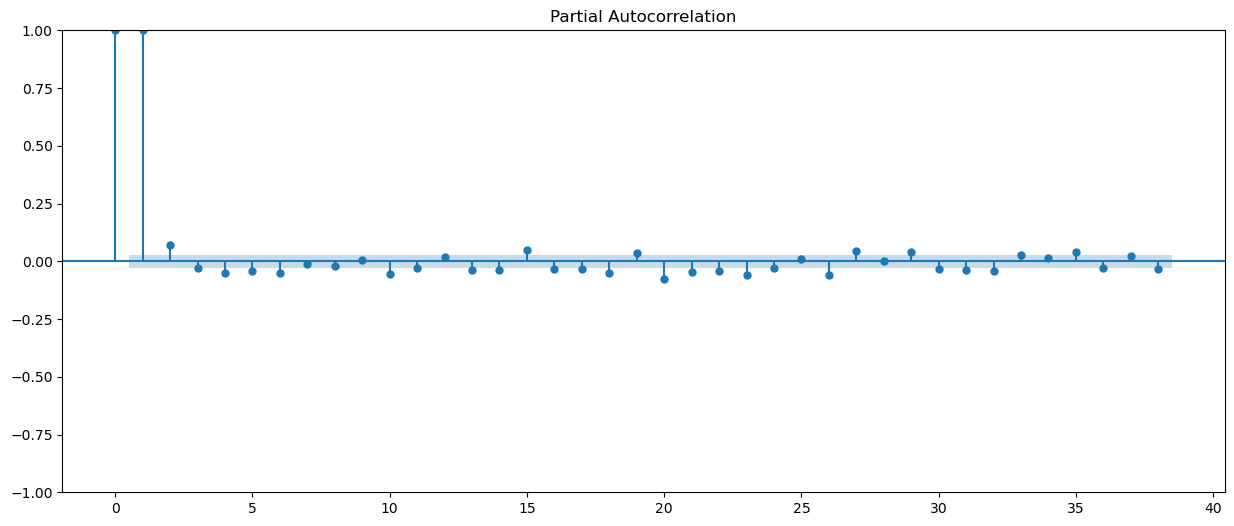

In [17]:
# Create a PACF plot
fig, ax = plt.subplots(figsize=(15, 6))
plot_pacf(df, ax=ax)

##### Split

In [18]:
#df.index = df.index.to_period('24H')
#train_ratio = 0.7
#val_ratio = 0.15
#test_ratio = 0.15
#
## Calculate the split points
#num_samples = len(df)
#train_split = int(train_ratio * num_samples)
#val_split = int((train_ratio + val_ratio) * num_samples)
#
## Split the data
#y_train = df.iloc[:train_split]
#y_val = df.iloc[train_split:val_split]
#y_test = df.iloc[val_split:]

In [19]:
df.index = df.index.to_period('24H')
cutoff = int(len(df.values)*0.8)

y_train = df.iloc[:cutoff]
y_test = df.iloc[cutoff:]

In [20]:
len(y_train), len(y_test)

(4173, 1044)

In [21]:
len(df)

5217

In [22]:
#baseline model
y_mean = y_train.mean()
y_pred_baseline =[y_mean] * len(y_train)
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)
rmse_baseline = np.sqrt(mean_squared_error(y_train, y_pred_baseline))
print("This is MAE_baseline Score:", mae_baseline)
print("This is RSME_baseline Score:", rmse_baseline)

This is MAE_baseline Score: 0.8279382729997349
This is RSME_baseline Score: 0.8719061951583793


##### Iterate

In [23]:
import time

In [24]:
p_params = range(0, 20,5)
q_params = range(0,3,1)

In [25]:
#Create empty dictionary for Mae
mae_grid = {}
for p in p_params:
    # Create new key in dictionary with empty list
    mae_grid[p] = []
    for q in q_params:
        # Set Hyperparameter for model
        order = (p,0,q)
        # Start timing
        start_time = time.time()
        # Train Model
        model = ARIMA(y_train, order = order).fit()
        # Generate Elapse time
        elapse_time = round(time.time()-start_time,2)
        print(f"Trained ARIMA{order} in {elapse_time} seconds")
        # In sample prediction
        y_pred = model.predict()
        # Calculate training MAE
        Mae = mean_absolute_error(y_train, y_pred)
        #Add MAE to dictionary
        mae_grid[p].append(Mae)

Trained ARIMA(0, 0, 0) in 1.02 seconds


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Trained ARIMA(0, 0, 1) in 1.59 seconds
Trained ARIMA(0, 0, 2) in 3.65 seconds
Trained ARIMA(5, 0, 0) in 1.24 seconds
Trained ARIMA(5, 0, 1) in 2.86 seconds
Trained ARIMA(5, 0, 2) in 4.62 seconds


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trained ARIMA(10, 0, 0) in 11.26 seconds
Trained ARIMA(10, 0, 1) in 6.17 seconds
Trained ARIMA(10, 0, 2) in 6.81 seconds
Trained ARIMA(15, 0, 0) in 8.77 seconds


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trained ARIMA(15, 0, 1) in 23.73 seconds
Trained ARIMA(15, 0, 2) in 12.61 seconds


In [26]:
df_mae = pd.DataFrame(mae_grid)
df_mae

,0,5,10,15
0,0.827938,0.003317,0.003327,0.003327
1,0.415223,0.003322,0.003359,0.003353
2,0.219940,0.003388,0.003347,0.003343


#####  Evaluate

In [28]:
y_pred_wfv = pd.Series()
for i in range(len(y_test)):
    model = ARIMA(y_train, order = (5,0,0)).fit()
    next_pred = model.forecast(steps = len(y_test))
    y_pred_wfv = pd.Series(next_pred)
    y_pred_wfv

C:\Users\HP\AppData\Local\Temp\ipykernel_16892\1100445031.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  y_pred_wfv = pd.Series()


In [29]:
 y_pred_wfv

2011-06-07 00:00    6.489258
2011-06-08 00:00    6.489074
2011-06-09 00:00    6.489933
2011-06-10 00:00    6.489827
2011-06-11 00:00    6.489863
                      ...   
2014-04-11 00:00    6.546462
2014-04-12 00:00    6.546515
2014-04-13 00:00    6.546568
2014-04-14 00:00    6.546620
2014-04-15 00:00    6.546673
Freq: 24H, Name: predicted_mean, Length: 1044, dtype: float64

In [30]:
# Calculate MAE
test_mae = mean_absolute_error(y_test, y_pred_wfv)
test_mae

0.2518563729232772

In [31]:
# Calculate RMSE
np.sqrt(mean_squared_error(y_test, y_pred_wfv))

0.29352983893871537